Titanic survival 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading Data

we use pandas read_csv function to read the csv file in python and pandas DataFrame method to convert the file into data frame.

In [107]:
df= pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


this depicts cabin column has a lot of missing values(687 and also age column has 177 missing values.Embarke has only 2 missing values.

now, Checking out the missing values more than 20%.

In [109]:
x=df.isnull().sum()
x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
col=x[x>(40/100*df.shape[0])]
col

Cabin    687
dtype: int64

checking which column has missing values more than 40%

In [21]:
y=df.isnull().sum()
col=y[y>(20/100*df.shape[0])]
col

Cabin    687
dtype: int64

In [22]:
col.index

Index(['Cabin'], dtype='object')

In [25]:
df.drop(col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

now,the age column contains 177 null values, But since age is necessary and it cannot be dropped,we have to fill it

In [26]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

we have to check whether which column has missing values more than 20%.

In [111]:
y=df.isnull().sum()
col=y[y>(20/100*df.shape[0])]
col

Cabin    687
dtype: int64

this detects cabin has missing values more than 20% we should delete the cabin column by assuming it to be unrelated.

In [30]:
col.index

Index(['Cabin'], dtype='object')

In [31]:
df.drop(col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

This depicts, More males Than Females.

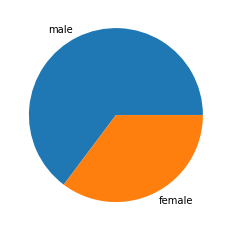

In [41]:
sorted_counts=df['Sex'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index);

You can see that men have a high prospect of survival when they are between 18 and 30 years old.For women the survived chances are higher between 14 and 40.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


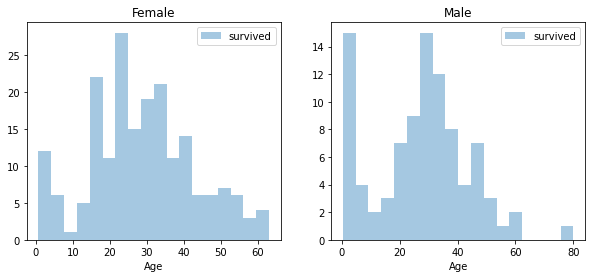

In [61]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = df[df['Sex']=='female']
male = df[df['Sex']=='male']
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)

ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)

ax.legend()
_ = ax.set_title('Male')

For men the prospect of survival is very low between the age of 5 and 18.But women has more survival capacity and also,infants also have a little bit higher prospect of survival.

In [64]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

This depicts Embarked has 891 null values therefore its filled.number of unique values(s,c,q) top means the element with highest frequency (s has the highest frequency ). Frq depicts number of 's' inside the embarked column(number of occurence of the top)

In [70]:
data=[df]
for members in data:
    members['relatives']=members['SibSp']+members['Parch']
    members.loc[members['relatives']>0,'not_alone']=0
    members.loc[members['relatives']==0,'not_alone']=1
    members['not_alone']=members['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

it shows that 537 were not alone while 354 were alone

Family sized affected the survival rate

In [71]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.135207
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.198270
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,-0.271832
relatives,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.690922
not_alone,0.057462,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,-0.690922,1.000000


dr.corr() shows the correction between different columns

SibSp and Parch would make more sense as a combined feature, that depicts the total number of relatives,so inorder to find the family size we have to add sibsp and parch together and find the number of people not having a family(alone).

In [75]:
df["alone"]=[0 if df['relatives'][i]>0 else 1 for i in df.index]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,0


In [76]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

This code depicts 'C' has higher value of survival compared to Q and S

In [98]:
df['relatives']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,relatives,not_alone,alone
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143,0.057462,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639,-0.203367,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997,0.135207,0.135207
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914,0.198270,0.198270
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138,-0.271832,-0.271832
relatives,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000,-0.690922,-0.690922
not_alone,0.057462,-0.203367,0.135207,0.198270,-0.271832,-0.690922,1.000000,1.000000
alone,0.057462,-0.203367,0.135207,0.198270,-0.271832,-0.690922,1.000000,1.000000


In [100]:
df.groupby(['alone'])['Survived'].mean()

alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [102]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Conclusion 

1) Females survived more than males


2)passengers boarded from cherbourg had higher survival rate passengers alone had lower chance of survival


3)passengers of class 1 hd higher chance of survival 